### Imports

In [6]:
import os
import rarfile
import requests
import pandas as pd
from typing import List
from io import StringIO 
from datetime import date

from bs4 import BeautifulSoup
from sina.config.credentials import (
    qqp_url,
    datos_abiertos_url, 
    gasolina_hmo_url,
    casa_ley_url
)

year = str(date.today().year)

### qqp

In [2]:
page = requests.get(qqp)
soup = BeautifulSoup(page.content, 'lxml')
download_link = None
for index, link in enumerate(soup.find_all('a')):
    if year in link.text:
        download_link = link['href']
        break
    
if download_link:
    url = os.path.join(datos_abiertos, download_link)
    rar_response = requests.get(url)
    rar_response.raise_for_status()

    with open('temp.rar', 'wb') as f:
        f.write(rar_response.content)

    with rarfile.RarFile('temp.rar') as rf:
        csv_files = [
            info for info in rf.infolist()
            if info.filename.lower().endswith('.csv') and year in info.filename
        ]

        newest_csv_info = max(csv_files, key=lambda x: x.date_time)
        
        print(f"📦 CSV más reciente: {newest_csv_info.filename}")
        print(f"🕒 Modificado: {newest_csv_info.date_time}")

        with rf.open(newest_csv_info) as csv_file_in_rar:
            df_qqp = pd.read_csv(csv_file_in_rar, encoding='utf-8', header=None)

os.remove('temp.rar')

FileNotFoundError: [WinError 2] El sistema no puede encontrar el archivo especificado: 'temp.rar'

In [13]:
nombres_columnas = [
    'PRODUCTO',
    'PRESENTACION',
    'MARCA',
    'CATEGORIA',
    'CATALOGO',
    'PRECIO',
    'FECHAREGISTRO',
    'CADENACOMERCIAL',
    'GIRO',
    'NOMBRECOMERCIAL', # Cambiado de 'NOMBRE_SUCURSAL' para coincidir con tu lista
    'DIRECCION',
    'ESTADO', # Movido para coincidir con el orden
    'MUNICIPIO', # Movido para coincidir con el orden
    'LATITUD',
    'LONGITUD'
]

df_qqp.columns = nombres_columnas

In [14]:
df_qqp[df_qqp['ESTADO'] == 'SONORA'].head()

,PRODUCTO,PRESENTACION,MARCA,CATEGORIA,CATALOGO,PRECIO,FECHAREGISTRO,CADENACOMERCIAL,GIRO,NOMBRECOMERCIAL,DIRECCION,ESTADO,MUNICIPIO,LATITUD,LONGITUD
438362,ACEITE,BOTELLA 946 ML. CANOLA,CANOIL,ACEITES Y GRASAS VEG. COMESTIBLES,PACIC,35.0,2025-09-17,BODEGA AURRERA,SUPERMERCADO / TIENDA DE AUTOSERVICIO,BODEGA AURRERA SUCURSAL CAMINO DEL SERI,"BLVD. CAMINO DEL SERI S/N, ESQ. QUINTERO ARCE,...",SONORA,HERMOSILLO,29.059734,-111.003909
438363,ACEITE,BOTELLA 850 ML. VEGETAL,GRAN TRADICIÓN,ACEITES Y GRASAS VEG. COMESTIBLES,PACIC,29.0,2025-09-17,BODEGA AURRERA,SUPERMERCADO / TIENDA DE AUTOSERVICIO,BODEGA AURRERA SUCURSAL CAMINO DEL SERI,"BLVD. CAMINO DEL SERI S/N, ESQ. QUINTERO ARCE,...",SONORA,HERMOSILLO,29.059734,-111.003909
438364,ACEITE,BOTELLA 946 ML. SOYA,GREAT VALUE,ACEITES Y GRASAS VEG. COMESTIBLES,PACIC,39.0,2025-09-17,BODEGA AURRERA,SUPERMERCADO / TIENDA DE AUTOSERVICIO,BODEGA AURRERA SUCURSAL CAMINO DEL SERI,"BLVD. CAMINO DEL SERI S/N, ESQ. QUINTERO ARCE,...",SONORA,HERMOSILLO,29.059734,-111.003909
438365,AGRIFEN,CAJA CON 10 TABLETAS,S/M,MEDICAMENTOS,MEDICAMENTOS,35.0,2025-09-17,BODEGA AURRERA,SUPERMERCADO / TIENDA DE AUTOSERVICIO,BODEGA AURRERA SUCURSAL CAMINO DEL SERI,"BLVD. CAMINO DEL SERI S/N, ESQ. QUINTERO ARCE,...",SONORA,HERMOSILLO,29.059734,-111.003909
438366,ARROZ,BOLSA 900 GR. EXTRA,AURRERA,ARROZ Y CEREALES PREPARADOS,PACIC,15.0,2025-09-17,BODEGA AURRERA,SUPERMERCADO / TIENDA DE AUTOSERVICIO,BODEGA AURRERA SUCURSAL CAMINO DEL SERI,"BLVD. CAMINO DEL SERI S/N, ESQ. QUINTERO ARCE,...",SONORA,HERMOSILLO,29.059734,-111.003909


In [15]:
# Analizamos FECHAREGISTRO
df_qqp_SON = df_qqp[df_qqp['ESTADO'] == 'SONORA'].copy()
df_qqp_SON['FECHAREGISTRO'] = pd.to_datetime(df_qqp_SON['FECHAREGISTRO'])
df_qqp_SON.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2681 entries, 438362 to 441042
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   PRODUCTO         2681 non-null   object        
 1   PRESENTACION     2681 non-null   object        
 2   MARCA            2681 non-null   object        
 3   CATEGORIA        2681 non-null   object        
 4   CATALOGO         2681 non-null   object        
 5   PRECIO           2681 non-null   float64       
 6   FECHAREGISTRO    2681 non-null   datetime64[ns]
 7   CADENACOMERCIAL  2681 non-null   object        
 8   GIRO             2681 non-null   object        
 9   NOMBRECOMERCIAL  2681 non-null   object        
 10  DIRECCION        2681 non-null   object        
 11  ESTADO           2681 non-null   object        
 12  MUNICIPIO        2681 non-null   object        
 13  LATITUD          2681 non-null   float64       
 14  LONGITUD         2681 non-null   float

In [16]:
df_qqp_SON.describe()

,PRECIO,FECHAREGISTRO,LATITUD,LONGITUD
count,2681.000000,2681,2681.000000,2681.000000
mean,182.015065,2025-09-22 18:26:27.168966912,29.085621,-110.964383
min,2.500000,2025-09-17 00:00:00,29.047784,-111.003909
25%,25.200000,2025-09-18 00:00:00,29.064224,-110.969103
50%,42.900000,2025-09-19 00:00:00,29.066052,-110.967512
75%,109.900000,2025-09-29 00:00:00,29.104300,-110.950883
max,4251.000000,2025-09-30 00:00:00,29.121467,-110.947868
std,382.779781,NaN,0.024406,0.016891


### gasolina

In [3]:
page = requests.get(gasolina_hmo)
soup = BeautifulSoup(page.content, 'lxml')
rows = []

for tr in soup.find_all('tr'):
    tds = tr.find_all('td', attrs={'data-label': True})
    if not tds:
        continue
    row = {td['data-label']: td.get_text(strip=True) for td in tds}
    rows.append(row)

In [4]:
pd.DataFrame(rows)

,Gasolinera,Dirección,Magna,Premium,Diesel
0,SERVICIOS Z3 SA DE CV,Ángel García Aburto Y Dr. Domingo Olivares,22.97,25.96,
1,"GRUPO GASOLINERO LM, S.A. DE C.V.",Carretera a Nogales Km 1.7,22.99,25.49,22.36
2,ESTACION DE SERVICIO LAS PALMAS SA DE CV,Perimetral Norte No. 1107,23.39,25.99,
3,COMBUSTIBLES Y SERVICIOS JARDIN JUAREZ SA DE CV,Calle Matamoros S/N,23.39,25.99,25.49
4,"CORPORATIVO ENERVISION, S.A.P.I. DE C.V.",Boulevard Gomez Farias Y Boulevard Ignacio Sot...,22.99,25.99,
...,...,...,...,...,...
144,SUPER GASOLINERAS DE LA FRONTERA S.A. DE C.V.,Francisco Monteverde No. 900,20.99,23.99,24.99
145,AUTOSERVICIO VERACRUZ SA DE CV,Veracruz No. 288 Esquina 12 de Octubre,21.49,24.99,
146,AUTO SERVICIO BACHOCO SA DE CV,Boulevard Morelos S/N Y Calle Siete,22.69,25.8,
147,"ESTACION PIRU, S.A. DE C.V.",Tayde López del Castillo Esquina Ignacio Salaz...,21.99,24.99,


### Casa Ley

#### selenium

In [3]:
import os
import re
import requests
import datetime
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, NoSuchElementException

from sina.config.paths import CASA_LEY_DATA
from sina.config.credentials import casa_ley_url as CASA_LEY_URL

# ==================== CONFIGURACIÓN ====================
CIUDAD_OBJETIVO = "Hermosillo"  # Puedes cambiar a cualquier ciudad disponible

HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}
CARPETA_SALIDA = CASA_LEY_DATA


def seleccionar_ciudad(driver, wait, ciudad: str):
    """
    Busca y hace clic en el botón de la ciudad especificada.
    """
    print(f"🏙️ Buscando botón de ciudad: {ciudad}...")
    
    # Estrategia 1: Buscar por texto exacto del botón
    try:
        # Buscar botón que contenga el texto de la ciudad
        boton_ciudad = wait.until(
            EC.element_to_be_clickable((
                By.XPATH, 
                f"//button[contains(text(), '{ciudad}')] | //a[contains(text(), '{ciudad}')] | //*[contains(@class, 'tab') and contains(text(), '{ciudad}')]"
            ))
        )
        boton_ciudad.click()
        print(f"✅ Ciudad '{ciudad}' seleccionada.")
        return True
    except TimeoutException:
        pass
    
    # Estrategia 2: Buscar en cualquier elemento clickeable con ese texto
    try:
        boton_ciudad = driver.find_element(
            By.XPATH,
            f"//*[normalize-space(text())='{ciudad}']"
        )
        boton_ciudad.click()
        print(f"✅ Ciudad '{ciudad}' seleccionada (estrategia 2).")
        return True
    except NoSuchElementException:
        pass
    
    # Estrategia 3: Buscar por atributo data-* o clase que contenga el nombre
    try:
        boton_ciudad = driver.find_element(
            By.XPATH,
            f"//*[contains(@data-city, '{ciudad.lower()}')] | //*[contains(@class, '{ciudad.lower()}')]"
        )
        boton_ciudad.click()
        print(f"✅ Ciudad '{ciudad}' seleccionada (estrategia 3).")
        return True
    except NoSuchElementException:
        print(f"❌ No se pudo encontrar el botón de '{ciudad}'.")
        return False


def esperar_iframe_publitas(driver, wait):
    """
    Espera a que el iframe de Publitas se cargue y cambia el contexto a él.
    """
    print("⏳ Esperando que el iframe del folleto se cargue...")
    
    # Esperar un momento para que el contenido se actualice tras seleccionar ciudad
    import time
    time.sleep(2)
    
    # Buscar el iframe de Publitas
    try:
        iframe = wait.until(
            EC.presence_of_element_located((
                By.CSS_SELECTOR, 
                'iframe[src*="publitas.com"], iframe[src*="view.publitas"]'
            ))
        )
        driver.switch_to.frame(iframe)
        print("✅ Iframe de Publitas encontrado. Accediendo al folleto...")
        return True
    except TimeoutException:
        print("❌ No se encontró el iframe de Publitas.")
        return False


def extraer_urls_paginas(driver, wait):
    """
    Navega por todas las páginas del folleto y extrae las URLs de las imágenes.
    """
    urls_folleto = set()
    
    # Esperar a que cargue la primera imagen
    try:
        wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, "img.left, img.right")))
        print("✅ Folleto inicial cargado.")
    except TimeoutException:
        print("⚠️ No se detectó imagen inicial, intentando continuar...")
    
    import time
    pagina_num = 1
    
    while True:
        try:
            # Obtener imagen actual para detectar cambio de página
            try:
                imagen_actual = driver.find_element(By.CSS_SELECTOR, "img.left, img.right").get_attribute('src')
            except:
                imagen_actual = ""
            
            # Parsear el HTML actual
            soup = BeautifulSoup(driver.page_source, 'lxml')
            
            # Extraer todas las imágenes del folleto
            nuevas_encontradas = 0
            for img in soup.select('img.left, img.right'):
                url_baja = img.get('src')
                if url_baja and 'publitas' in url_baja:
                    url_alta = re.sub(r'-at\d+', '-at2400', url_baja)
                    if url_alta not in urls_folleto:
                        print(f"📄 Página {pagina_num} encontrada: {url_alta[:80]}...")
                        urls_folleto.add(url_alta)
                        pagina_num += 1
                        nuevas_encontradas += 1
            
            # Intentar ir a la siguiente página
            try:
                next_button = driver.find_element(By.ID, "next_slide")
                
                # Verificar si el botón está deshabilitado
                button_class = next_button.get_attribute('class') or ""
                if 'disabled' in button_class:
                    print("🔚 Botón 'Siguiente' deshabilitado. Fin del folleto.")
                    break
                
                print("▶️ Pasando a la siguiente página...")
                
                # ✅ SOLUCIÓN: Usar JavaScript para hacer click
                driver.execute_script("arguments[0].click();", next_button)
                
                # Esperar a que cambie la imagen
                time.sleep(1)  # Pequeña pausa para animación
                wait.until(
                    lambda d: d.find_element(By.CSS_SELECTOR, "img.left, img.right").get_attribute('src') != imagen_actual
                )
                
            except NoSuchElementException:
                print("🔚 No se encontró botón 'Siguiente'. Terminando.")
                break
            except TimeoutException:
                # Si no cambió la imagen pero no hay error, puede ser la última página
                if nuevas_encontradas == 0:
                    print("🔚 No hay más páginas nuevas. Fin del folleto.")
                    break
                print("⏱️ Timeout esperando cambio de página. Reintentando...")
                time.sleep(1)
                continue
                
        except Exception as e:
            print(f"⚠️ Error durante extracción: {type(e).__name__}: {e}")
            break
    
    return urls_folleto


def descargar_imagenes(urls: set, carpeta_base: str, ciudad: str):
    """
    Descarga las imágenes creando una jerarquía profesional: carpeta_base / ciudad / YYYY-MM-DD /
    """
    if not urls:
        print("\n⚠️ No se encontraron URLs para descargar.")
        return

    # 1. Crear el timestamp en formato YYYY-MM-DD (Estándar profesional)
    fecha_hoy = datetime.datetime.now().strftime("%Y-%m-%d")
    
    # 2. Crear la ruta de la carpeta específica para esta descarga
    # Ejemplo: /datos/casa_ley/hermosillo/2026-02-04/
    ciudad_limpia = ciudad.lower().replace(" ", "_").replace("á", "a").replace("é", "e").replace("í", "i").replace("ó", "o").replace("ú", "u")
    carpeta_destino = os.path.join(carpeta_base, ciudad_limpia, fecha_hoy)
    
    os.makedirs(carpeta_destino, exist_ok=True)

    lista_urls = sorted(list(urls))
    print(f"\n--- Iniciando descarga de {len(lista_urls)} imágenes en: {carpeta_destino} ---")

    for i, url in enumerate(lista_urls):
        try:
            # Ya no necesitamos la fecha en el nombre del archivo, porque la carpeta ya la tiene
            nombre_archivo = os.path.join(carpeta_destino, f"pagina_{i+1:02d}.jpg")
            
            response = requests.get(url, headers=HEADERS, timeout=30)
            response.raise_for_status()
            
            with open(nombre_archivo, 'wb') as f:
                f.write(response.content)
            print(f"✅ Guardada: {nombre_archivo}")
            
        except requests.exceptions.RequestException as e:
            print(f"❌ Error al descargar {url}: {e}")

    print("\n🎉 ¡Proceso completado!")


def descargar_folleto_ley(ciudad: str = CIUDAD_OBJETIVO):
    """
    Función principal que encapsula toda la lógica de scraping y descarga.
    
    Args:
        ciudad: Nombre de la ciudad (debe coincidir con el texto del botón en la página)
    """
    print(f"🚀 Iniciando scraper de Casa Ley para: {ciudad}")
    print(f"📍 URL: {CASA_LEY_URL}")
    
    # Configurar Selenium
    options = webdriver.ChromeOptions()
    options.add_argument("--headless")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    options.add_argument("--window-size=1920,1080")  # Ventana grande para ver todos los botones
    
    driver = webdriver.Chrome(options=options)
    wait = WebDriverWait(driver, 20)
    
    urls_folleto = set()
    
    try:
        # 1. Navegar a la página principal
        driver.get(CASA_LEY_URL)
        print("✅ Página cargada.")
        
        # 2. Esperar a que los botones de ciudad estén disponibles
        import time
        time.sleep(3)  # Dar tiempo a que cargue JavaScript
        
        # 3. Seleccionar la ciudad
        if not seleccionar_ciudad(driver, wait, ciudad):
            print("❌ No se pudo seleccionar la ciudad. Abortando.")
            return
        
        # 4. Esperar a que el iframe se actualice
        time.sleep(2)
        
        # 5. Acceder al iframe de Publitas
        if not esperar_iframe_publitas(driver, wait):
            print("❌ No se pudo acceder al iframe. Abortando.")
            return
        
        # 6. Extraer todas las URLs de las páginas
        urls_folleto = extraer_urls_paginas(driver, wait)
        
    except Exception as e:
        print(f"❌ Error general: {e}")
        import traceback
        traceback.print_exc()
        
    finally:
        driver.quit()
        print("\n🔒 Navegador cerrado.")
    
    # 7. Descargar las imágenes
    descargar_imagenes(urls_folleto, CARPETA_SALIDA, ciudad=ciudad)


# ==================== EJECUCIÓN ====================
if __name__ == "__main__":
    # Puedes cambiar la ciudad aquí o pasarla como argumento
    descargar_folleto_ley(ciudad="Hermosillo")
    
    # Ejemplo para otras ciudades:
    # descargar_folleto_ley(ciudad="Culiacán")
    # descargar_folleto_ley(ciudad="Tijuana")

🚀 Iniciando scraper de Casa Ley para: Hermosillo
📍 URL: https://view.publitas.com/casa-ley/volante-hermosillo
✅ Página cargada.
🏙️ Buscando botón de ciudad: Hermosillo...
❌ No se pudo encontrar el botón de 'Hermosillo'.
❌ No se pudo seleccionar la ciudad. Abortando.

🔒 Navegador cerrado.


In [ ]:
import os
import re
import json
import time
import datetime
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, NoSuchElementException
from bs4 import BeautifulSoup

from sina.config.paths import CASA_LEY_DATA
from sina.config.credentials import casa_ley_url as CASA_LEY_URL

HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
}


def extract_images(driver) -> set[str]:
    """Extracts high-res image URLs from current page view."""
    urls = set()
    soup = BeautifulSoup(driver.page_source, 'lxml')
    
    for img in soup.select('img.left, img.right'):
        src = img.get('src', '')
        if 'publitas' in src:
            high_res = re.sub(r'-at\d+', '-at2400', src)
            urls.add(high_res)
    
    return urls


def discover_pages(base_url: str) -> dict[int, str]:
    """
    Opens page/1, clicks next until the end.
    Returns {page_number: image_url}
    """
    print(f"🔍 Opening: {base_url}")
    
    options = webdriver.ChromeOptions()
    options.add_argument("--headless")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    options.add_argument("--window-size=1920,1080")
    
    driver = webdriver.Chrome(options=options)
    wait = WebDriverWait(driver, 15)
    pages = {}
    
    try:
        driver.get(base_url)
        time.sleep(3)
        
        # Esperar a que cargue la primera imagen
        try:
            wait.until(EC.visibility_of_element_located(
                (By.CSS_SELECTOR, "img.left, img.right")
            ))
            print("✅ First image loaded.")
        except TimeoutException:
            print("❌ No images found on first page.")
            return pages
        
        page_num = 1
        
        while True:
            # Capturar imagen actual para detectar cambio
            try:
                current_src = driver.find_element(
                    By.CSS_SELECTOR, "img.left, img.right"
                ).get_attribute('src')
            except:
                current_src = ""
            
            # Extraer URLs de esta vista
            new_urls = extract_images(driver)
            for url in new_urls:
                if url not in pages.values():
                    pages[page_num] = url
                    print(f"📄 Page {page_num}: ✅")
                    page_num += 1
            
            # Intentar ir a la siguiente página
            try:
                next_btn = driver.find_element(By.ID, "next_slide")
                
                btn_class = next_btn.get_attribute('class') or ""
                if 'disabled' in btn_class:
                    print("🔚 Last page reached (button disabled).")
                    break
                
                driver.execute_script("arguments[0].click();", next_btn)
                
                # Esperar a que cambie la imagen
                try:
                    wait.until(
                        lambda d: d.find_element(
                            By.CSS_SELECTOR, "img.left, img.right"
                        ).get_attribute('src') != current_src
                    )
                    time.sleep(0.5)
                except TimeoutException:
                    print("🔚 Image didn't change. End of flyer.")
                    break
                    
            except NoSuchElementException:
                print("🔚 No 'next' button found. End of flyer.")
                break
    
    except Exception as e:
        print(f"❌ Error: {e}")
    
    finally:
        driver.quit()
        print(f"\n📊 Total pages: {len(pages)}")
    
    return pages


def download_flyer(base_url: str, city: str, base_dir: str) -> bool:
    """
    Discovers all pages via Selenium, downloads images, saves metadata.
    """
    print(f"🚀 Downloading flyer for: {city}")
    
    # 1. Descubrir páginas
    pages = discover_pages(base_url)
    
    if not pages:
        print("\n⚠️ No pages found.")
        return False
    
    # 2. Preparar directorio
    today = datetime.datetime.now().strftime("%Y-%m-%d")
    timestamp = datetime.datetime.now().isoformat()
    
    clean_city = (
        city.lower()
        .replace(" ", "_")
        .replace("á", "a").replace("é", "e")
        .replace("í", "i").replace("ó", "o").replace("ú", "u")
    )
    output_dir = os.path.join(base_dir, clean_city, today)
    os.makedirs(output_dir, exist_ok=True)
    
    # 3. Descargar imágenes
    print(f"\n--- Downloading {len(pages)} images to: {output_dir} ---")
    success = 0
    
    metadata = {
        "city": city,
        "extracting_date": timestamp,
        "base_url": base_url,
        "total_pages_found": len(pages),
        "pages": {}
    }
    
    for page_num, img_url in sorted(pages.items()):
        try:
            file_name = f"page_{page_num:02d}.jpg"
            file_path = os.path.join(output_dir, file_name)
            
            response = requests.get(img_url, headers=HEADERS, timeout=30)
            response.raise_for_status()
            
            with open(file_path, 'wb') as f:
                f.write(response.content)
            
            print(f"✅ {file_name} ({len(response.content) // 1024} KB)")
            success += 1
            
            metadata['pages'][file_name] = {
                "source_url": img_url,
                "page_url": f"{base_url}/page/{page_num}",
                "size_bytes": len(response.content)
            }
            
        except requests.exceptions.RequestException as e:
            print(f"❌ Page {page_num}: {e}")
    
    # 4. Metadata
    metadata['total_pages_downloaded'] = success
    metadata['status'] = (
        "success" if success == len(pages)
        else "partial" if success > 0
        else "failed"
    )
    
    metadata_path = os.path.join(output_dir, "metadata.json")
    with open(metadata_path, "w", encoding="utf-8") as f:
        json.dump(metadata, f, indent=2, ensure_ascii=False)
    
    print(f"\n📋 Metadata: {metadata_path}")
    print(f"✅ {success}/{len(pages)} downloaded")
    print("🎉 ¡Success!" if success == len(pages) else "⚠️ Some pages failed")
    
    return success == len(pages)


if __name__ == "__main__":
    download_flyer(
        base_url=CASA_LEY_URL,   # https://view.publitas.com/casa-ley/volante-hermosillo
        city="Hermosillo",
        base_dir=CASA_LEY_DATA
    )

🚀 Downloading flyer for: Hermosillo
🔍 Opening: https://view.publitas.com/casa-ley/volante-hermosillo/page/1
✅ First image loaded.
📄 Page 1: ✅
📄 Page 2: ✅
🔚 Image didn't change. End of flyer.

📊 Total pages: 2

--- Downloading 2 images to: C:\Users\angel.merino\Documents\GitHub\sina\datos\casa_ley\hermosillo\2026-02-26 ---
✅ page_01.jpg (2224 KB)
✅ page_02.jpg (2522 KB)

📋 Metadata: C:\Users\angel.merino\Documents\GitHub\sina\datos\casa_ley\hermosillo\2026-02-26\metadata.json
✅ 2/2 downloaded
🎉 ¡Success!


In [5]:
from sina.scraping.casa_ley import get_ley_flyer
from sina.config.credentials import casa_ley_url
from sina.config.paths import CASA_LEY_DATA

In [2]:
casa_ley_url

'https://www.casaley.com.mx/clientes/ofertas-autoservicio/'

In [6]:
get_ley_flyer(city="Hermosillo", url=casa_ley_url, folder=CASA_LEY_DATA)

🚀 Scraping flyer from city: Hermosillo
📍 URL: https://www.casaley.com.mx/clientes/ofertas-autoservicio/
✅ Page charged.
🏙️ Searching city's button: Hermosillo...
✅ City 'Hermosillo' found.
⏳ Waiting iframe...
✅ iframe found.
⚠️ Initial flyer not found, next...
📄 Page 1 found: https://view.publitas.com/89081/1567835/pages/d2f49d2d-8948-4c17-8b07-82c816644c...
📄 Page 2 found: https://view.publitas.com/89081/1567835/pages/3ce9d313-89c1-4627-945b-510d613299...
▶️ Next page...
⏱️ Waiting page to change...
🔚 End of the flyer.

🔒 Closing web page.

--- Downloading 2 imgs in: C:\Users\angel.merino\Documents\GitHub\sina\datos\casa_ley\hermosillo\2026-02-25 ---
✅ Saved: C:\Users\angel.merino\Documents\GitHub\sina\datos\casa_ley\hermosillo\2026-02-25\page_01.jpg
✅ Saved: C:\Users\angel.merino\Documents\GitHub\sina\datos\casa_ley\hermosillo\2026-02-25\page_02.jpg

📋 Metadata saved: C:\Users\angel.merino\Documents\GitHub\sina\datos\casa_ley\hermosillo\2026-02-25\metadata.json
✅ 2/2 pages downloaded

In [ ]:
import cv2
import json
from typing import List, Dict, Any

# Adjust these imports according to your actual project structure
from sina.config.paths import DATA

def hex_to_bgr(hex_color: str) -> tuple:
    """
    Converts a HEX color string (e.g., '#FF0000') to a BGR tuple for OpenCV (0, 0, 255).
    """
    hex_color = hex_color.lstrip('#')
    rgb = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
    return (rgb[2], rgb[1], rgb[0])

def process_annotations(
        supermarket: str,
        city: str,
        date: str,
        image_name: str,
        bboxes: List[Any]
):
    image_path = DATA / supermarket / city / date / image_name

    if not image_path.exists():
        raise FileNotFoundError(f"Image not found at path: {image_path}")
    
    img = cv2.imread(str(image_path))
    if img is None:
        raise ValueError(f"OpenCV could not load the image: {image_path}")
        
    annotated_img = img.copy()
    base_name = image_path.stem  
    
    generated_crops = []

    for idx, box in enumerate(bboxes):
        label = box.label
        color_hex = getattr(box, 'color', '#00FF00') # Default to green if color is missing
        x, y, w, h = box.x, box.y, box.w, box.h
        
        # 1. CROP AND SAVE
        # OpenCV slicing uses format: [y:y+h, x:x+w]
        cropped_area = img[y:y+h, x:x+w]
        
        # Create subfolder for the specific class (e.g., /casa_ley/hermosillo/2026-02-26/recortes/)
        crop_dir = DATA / supermarket / city / date / "recortes"
        crop_dir.mkdir(parents=True, exist_ok=True)
        
        crop_filename = f"{base_name}_crop_{idx:03d}_{label}.jpg"
        crop_filepath = crop_dir / crop_filename
        
        # Save crop (only if it has valid dimensions)
        if cropped_area.size > 0:
            cv2.imwrite(str(crop_filepath), cropped_area)
            generated_crops.append(str(crop_filepath))

        # 2. DRAW ON THE FULL ANNOTATED IMAGE
        bgr_color = hex_to_bgr(color_hex)
        
        # Draw rectangle
        cv2.rectangle(annotated_img, (x, y), (x+w, y+h), bgr_color, thickness=3)
        
        # Draw label text background and text
        font = cv2.FONT_HERSHEY_SIMPLEX
        text_size = cv2.getTextSize(label, font, 0.8, 2)[0]
        cv2.rectangle(annotated_img, (x, y - text_size[1] - 10), (x + text_size[0] + 10, y), bgr_color, -1)
        cv2.putText(annotated_img, label, (x + 5, y - 5), font, 0.8, (0, 0, 0), 2)

    # 3. SAVE FULL ANNOTATED IMAGE
    annotated_dir = DATA / supermarket / city / date / "annotated" 
    annotated_dir.mkdir(parents=True, exist_ok=True)
    annotated_filepath = annotated_dir / f"{base_name}_annotated.jpg"
    cv2.imwrite(str(annotated_filepath), annotated_img)

    # 4. SAVE LABELS / COORDINATES AS JSON
    labels_dir = DATA / supermarket / city / date / "labels" 
    labels_dir.mkdir(parents=True, exist_ok=True)
    json_filepath = labels_dir / f"{base_name}.json"
    
    # Format data to save it
    boxes_dict = [b.dict() for b in bboxes]
    with open(json_filepath, "w", encoding="utf-8") as f:
        json.dump(boxes_dict, f, indent=4)

    return {
        "crops_saved": len(generated_crops),
        "annotated_image_path": str(annotated_filepath),
        "labels_file_path": str(json_filepath)
    }



#### bs4

In [ ]:
from sina.config.settings import CASA_LEY_DATA

In [3]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

page = requests.get(casa_ley, headers=headers)

soup = BeautifulSoup(page.content, 'lxml')

imgs_tag : List[str] = []
for tag in soup.find_all('img', class_='attachment-full'):
    imgs_tag.append(tag['src'])

if imgs_tag:
    print(f"✅ Se encontraron {len(imgs_tag)} imágenes. Iniciando descarga...")
    for url in imgs_tag:
        try:
            # 1. Extraemos el nombre del archivo de la URL
            nombre_archivo = url.split('/')[-1]
            print(f"📥 Descargando: {nombre_archivo}")
            
            # 2. Hacemos la solicitud para obtener la imagen (¡usando headers!)
            response_img = requests.get(url, headers=headers)
            response_img.raise_for_status() # Verifica si hay errores en la descarga
            
            # 3. Guardamos la imagen en la carpeta 'folletos' con su nombre original
            ruta_guardado = os.path.join(CASA_LEY_DATA, nombre_archivo)
            with open(ruta_guardado, 'wb') as f:
                f.write(response_img.content)
            
            print(f"   ✅ Guardado como: {ruta_guardado}")

        except requests.exceptions.RequestException as e:
            print(f"   ❌ Error al descargar {url}: {e}")
            
    print("\n🎉 ¡Proceso completado!")
else:
    print("❌ No se encontraron imágenes con la clase 'attachment-full'.")

❌ No se encontraron imágenes con la clase 'attachment-full'.


#### Extracción de texto

In [4]:
from datetime import date
system_prompt = f"""
Eres un asistente que SOLO responde con JSON válido y nada más. 
Si no puedes identificar la información, devuelve un JSON vacío con la estructura. 
NO des explicaciones, NO uses enlaces, NO texto fuera del JSON.
Debes hacer OCR del texto de la imagen, interpretar las ofertas DE IZQUIERDA A DERECHA EN Z.
Debes devolver exclusivamente un JSON válido con la siguiente estructura:

Estructura:
{{
  "productos": [
    {{
      "nombre": "Nombre del producto, marca, o categoría",
      "precio": "Precio numérico COMPLETO con moneda SI es que se menciona",
      "oferta": "ej. 2x1, 3x2, 2x$precio, etc.",
      "presentación": "Cantidad y unidad kg, g, ml, L, etc.",
      "limites": "límite de compra máxima o mínima que aplica en la oferta",
      "condiciones": "Condiciones especiales para aplicar la oferta"
    }}
  ],
  "vigencia": "Fecha de los precios y ofertas válidas",
  "sucursales": "Sucursales donde aplican",
  "detalles" : "Detalles que se mencionan de forma general, como términos y condiciones."
}}

Ejemplo de salida:
{{
  "productos":[
    {{
      "nombre":"Leche Lala",
      "precio": null,
      "oferta":"2x$45",
      "presentación":"1L",
      "limites":"Máximo 4 por cliente"
    }},
    {{
      "nombre":"Platanos",
      "precio": "$20",
      "oferta": null,
      "presentación":"1 kg",
      "limites": null
    }},
    {{
      "nombre":"Cósmeticos L'Oreal",
      "precio": null,
      "oferta":"40%",
      "presentación":"todos los cósmeticos",
      "limites": null,
      "condiciones": "excepto lineadores"
    }}
  ],
  "vigencia":"del 23 al 29 de Septiembre 2025",
  "sucursales":"Todas las sucursales Casa Ley Hermosillo",
  "detalles":"Válido hasta agotar existencias"
}}

Si el producto está incompleto o ilegible, no lo incluyas.
Si un dato no aparece en el folleto, deja el campo en null o "".
Devuelve SIEMPRE un JSON válido.

Hoy es {date.today().isoformat()}, así que usa esta fecha como referencia si es necesario.
"""


In [ ]:
import ollama
from PIL import Image
from sina.settings.config import CASA_LEY_DATA

#casa_ley_folleto = f"{CASA_LEY_DATA}/window_0_1000.jpg"  # tu imagen
casa_ley_folleto = f"{CASA_LEY_DATA}/30102025_pagina_01.jpg"  # tu imagen

##### gemma3:27b

In [6]:
def sliding_window_vertical(image_path, window_height=1000, overlap=100, path=None):
    """
    Recorre la imagen con una ventana vertical (window_height) con solape (overlap).
    """
    img = Image.open(image_path)
    width, height = img.size
    tiles = []
    step = window_height - overlap
    for top in range(0, height, step):
        bottom = min(top + window_height, height)
        tile = img.crop((0, top, width, bottom))
        filename = f"window_{top}_{bottom}.jpg"
        tile.save(f"{path}/{filename}", quality=100)
        tiles.append(f"{path}/{filename}")
        if bottom == height:
            break
    return tiles

In [7]:
tiles_vertical = sliding_window_vertical(casa_ley_folleto, path=CASA_LEY_DATA)

In [12]:
# No necesitas importar 'date' aquí, puedes pasar la fecha directamente.
from datetime import date

# La fecha se calcula una vez y se inserta en el f-string.
current_date = date.today().isoformat()

system_prompt = f"""
Eres un motor de extracción de datos de alta precisión.
Tu única misión es analizar imágenes de folletos de supermercados y convertirlas en un objeto JSON estructurado y válido.

Misión Principal
1.  Analiza la imagen: Procesa el contenido visual de manera metódica: de arriba hacia abajo y de izquierda a derecha.
2.  Asocia la información: Vincula correctamente cada precio, oferta y descripción con el producto más cercano. Infiere la información del contexto (ej. si el precio dice "/kg", la presentación es "1 kg").
3.  Genera el JSON: Construye un único objeto JSON que se adhiera estrictamente a la estructura y reglas definidas a continuación.

Estructura de Salida Obligatoria (JSON)
Devuelve EXCLUSIVAMENTE un objeto JSON con la siguiente estructura. No incluyas texto, explicaciones ni comentarios antes o después del JSON.

{{
  "productos": [
    {{
      "nombre": "string | null - Nombre específico del producto, incluyendo marca si es visible (ej. 'Limón con semilla', 'Queso Crema Philadelphia').",
      "precio": "string | null - El precio final por unidad. Si el precio es parte de una oferta (ej. 2x$99), este campo debe ser null.",
      "oferta": "string | null - La promoción aplicable. Usa formatos consistentes: '2x1', '3x2', '2x$99', '50%', '$10 de descuento'.",
      "presentacion": "string | null - La cantidad, peso o volumen del producto (ej. '1 kg', '900 g', '1 L', 'Caja con 10 tabletas').",
      "limites": "string | null - Límite de piezas o kilos por cliente (ej. 'Máximo 5 kg por cliente').",
      "condiciones": "string | null - Cualquier otra condición para que la oferta aplique (ej. 'En la compra de 1', 'Pagando con Tarjeta X')."
    }}
  ],
  "vigencia": "string | null - El periodo de validez exacto de las ofertas (ej. 'Del 23 al 29 de Septiembre 2025').",
  "sucursales": "string | null - Las tiendas o ciudades donde aplica la promoción (ej. 'Sucursales Casa Ley en Hermosillo').",
  "detalles": "string | null - Cualquier texto general, como 'Válido hasta agotar existencias' o 'Aplican restricciones'."
}}

Reglas Críticas
- SOLO JSON: Tu respuesta debe ser únicamente el objeto JSON. Sin excepciones.
- INTEGRIDAD DE DATOS: Si el nombre o precio de un producto está cortado, borroso o es ilegible, OMITE ese producto por completo de la lista.
- MANEJO DE NULOS: Si un campo específico (ej. "oferta") no se menciona para un producto, su valor DEBE ser `null`.
- NO ASUMIR: No inventes información que no esté explícitamente en la imagen.

Contexto
- Fecha de hoy: {current_date}. Usa esta fecha como referencia para entender la vigencia del folleto, pero no la incluyas en la salida.

Ejemplo de Salida:
{{
  "productos": [
    {{
      "nombre": "Leche Lala 100 sin lactosa",
      "precio": null,
      "oferta": "2x$50",
      "presentacion": "1L",
      "limites": null,
      "condiciones": null
    }},
    {{
      "nombre": "Sandía Rayada",
      "precio": "$13.75",
      "oferta": null,
      "presentacion": "1 kg",
      "limites": null,
      "condiciones": null
    }},
    {{
      "nombre": "Todos los cosméticos L'Oreal",
      "precio": null,
      "oferta": "40% de descuento",
      "presentacion": null,
      "limites": null,
      "condiciones": "Excepto delineadores"
    }}
  ],
  "vigencia": "Vigencia del 23 al 29 de Septiembre 2025",
  "sucursales": "Tiendas Ley de Hermosillo",
  "detalles": "Válido hasta agotar existencias. Aclaraciones en tienda."
}}
"""

In [50]:
ofertas = []
for tile in tiles_vertical:
  resp = ollama.chat(
      model="gemma3:27b",
      messages=[
          {
              'role': 'system',
              'content': system_prompt
          },
          {
              'role': 'user',
              'content': "Folleto de casa ley",
              'images': [tile]  # 👈 lista de rutas de imagen
          }
      ],
      options={'temperature': 0}
  )
  ofertas.append(resp['message']['content'])

In [52]:
import json

for oferta in ofertas:
    # Quitamos el bloque ```json ... ```
    limpio = oferta.replace('```json', '').replace('```', '').strip()
    try:
        data = json.loads(limpio)
        print(json.dumps(data, indent=2, ensure_ascii=False))
    except json.JSONDecodeError:
        print("No es JSON válido:", limpio)
    print("-"*40)


{
  "productos": [
    {
      "nombre": "Pañal Huggies All Around",
      "precio": "$89.90",
      "oferta": null,
      "presentacion": "Paquete con 40 piezas",
      "limites": null,
      "condiciones": null
    },
    {
      "nombre": "Pañal Huggies Supreme",
      "precio": "$89.90",
      "oferta": null,
      "presentacion": "Paquete con 36 piezas",
      "limites": null,
      "condiciones": null
    },
    {
      "nombre": "Pañal Huggies Eco Protect",
      "precio": "$79.90",
      "oferta": null,
      "presentacion": "Paquete con 32 piezas",
      "limites": null,
      "condiciones": null
    },
    {
      "nombre": "Tostitos Salsa Verde y Habanero",
      "precio": "$29.90",
      "oferta": "3x2",
      "presentacion": "240 g",
      "limites": "Máximo 6 por cliente",
      "condiciones": null
    },
    {
      "nombre": "Atún Mazatun en agua o aceite",
      "precio": "$23.90",
      "oferta": null,
      "presentacion": "130 g",
      "limites": null,
      "condi

In [40]:
resp = ollama.chat(
      model="gemma3:27b",
      messages=[
          {
              'role': 'system',
              'content': system_prompt
          },
          {
              'role': 'user',
              'content': "Folleto de casa ley",
              'images': [casa_ley_folleto]  # 👈 lista de rutas de imagen
          }
      ],
      options={'temperature': 0}
  )

In [44]:
print(resp['message']['content'])

```json
{
  "productos": [
    {
      "nombre": "Shampoo Head & Shoulders",
      "precio": "$219.90",
      "oferta": null,
      "presentación": "650 ml",
      "limites": null
    },
    {
      "nombre": "Desodorante Axe",
      "precio": "$105",
      "oferta": null,
      "presentación": "115 g",
      "limites": null
    },
    {
      "nombre": "Ventilador",
      "precio": "$299.90",
      "oferta": null,
      "presentación": "16\"",
      "limites": null
    },
    {
      "nombre": "Aceites",
      "precio": "$239.90",
      "oferta": null,
      "presentación": "1 L",
      "limites": null
    },
    {
      "nombre": "Papel Higiénico",
      "precio": "$68.90",
      "oferta": null,
      "presentación": "32 rollos",
      "limites": null
    },
    {
      "nombre": "Salsa Catsup",
      "precio": "$29.90",
      "oferta": null,
      "presentación": "320 g",
      "limites": null
    },
    {
      "nombre": "Atún",
      "precio": "$22.90",
      "oferta": null,
     

##### qwen3


In [8]:
response = ollama.chat(
    model="qwen3-vl:30b",
    messages=[
          {
              'role': 'system',
              'content': system_prompt
          },
          {
              'role': 'user',
              'content': "Analiza este folleto",
              'images': [casa_ley_folleto]  # 👈 lista de rutas de imagen
          }
      ],
    options={'temperature': 0, 'format': 'json'}
  )

In [9]:
print(response['message']['content'])



[
  {
    "producto": "ESTILIZADORES",
    "oferta": "3x2",
    "precio": "$32.90"
  },
  {
    "producto": "LAVADORA",
    "oferta": "2x$45",
    "precio": "$1,299.90"
  },
  {
    "producto": "CAMISETAS",
    "oferta": "3x2",
    "precio": "$19.90"
  }
]


##### llama3.2

In [ ]:
response = ollama.chat(
    model="llama3.2-vision:11b",
    messages=[
          {
              'role': 'system',
              'content': "extrae el contenido textual de las ofertas que veas en la imagen, procura que esté relacionada la promoción al producto"
          },
          {
              'role': 'user',
              'content': "Analiza este folleto",
              'images': [casa_ley_folleto]  # 👈 lista de rutas de imagen
          }
      ],
    options={'temperature': 0, 'format': 'json'}
  )

In [46]:
print(response['message']['content'])

El folleto de Ley es un documento que promueve la celebración de su aniversario con ofertas y descuentos en productos de la casa, limpieza, belleza, alimentación, bebidas, entre otros. El folleto se divide en secciones que presentan diferentes categorías de productos, como la sección de la casa, la sección de limpieza, la sección de belleza, la sección de alimentación, la sección de bebidas, la sección de productos para la familia, la sección de productos para la casa, la sección de productos para la limpieza, la sección de productos para la belleza, la sección de productos para la alimentación, la sección de productos para las bebidas, la sección de productos para la familia, la sección de productos para la casa, la sección de productos para la limpieza, la sección de productos para la belleza, la sección de productos para la alimentación, la sección de productos para las bebidas, la sección de productos para la familia, la sección de productos para la casa, la sección de productos pa

In [51]:
response = ollama.chat(
    model="llama3.2-vision:11b",
    messages=[
          {
              'role': 'system',
              'content': "qué ves en esta imagen?"
          },
          {
              'role': 'user',
              'content': "Analiza este folleto",
              'images': [casa_ley_folleto]  # 👈 lista de rutas de imagen
          }
      ],
    options={'temperature': 0, 'format': 'json'}
  )

In [52]:
casa_ley_folleto

'C:\\Users\\angel.merino\\Documents\\GitHub\\jita\\datos\\casa_ley/pagina_01.jpg'

In [53]:
print(response['message']['content'])

El folleto de la tienda de la competencia de la tienda de la competencia de la tienda de la competencia de la tienda de la competencia de la ti… (y así…)

El folleto de la tienda de la competencia de la ti… (y así…)

El folle… (y así…)

El… (y así…)

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El

In [59]:
casa_ley_folleto

'C:\\Users\\angel.merino\\Documents\\GitHub\\jita\\datos\\casa_ley/window_0_1000.jpg'

In [57]:
from ollama_ocr import OCRProcessor

# Initialize OCR processor
ocr = OCRProcessor(model_name='llama3.2-vision:11b')  # You can use any vision model available on Ollama

# Process an image
result = ocr.process_image(
    image_path=casa_ley_folleto,#image_path="path/to/your/pdf"
    format_type="json",  # Options: markdown, text, json, structured, key_value
    #custom_prompt=system_prompt # Optional custom prompt
)

Using default prompt: Extract all text from this image in en and format it as JSON, **strictly preserving** the structure.
                                - **Do not summarize, add, or modify any text.**
                                - Maintain hierarchical sections and subsections as they appear.
                                - Use keys that reflect the document's actual structure (e.g., "title", "body", "footer").
                                - Include all text, even if fragmented, blurry, or unclear.
                                


In [58]:
print(result)

**Title:** "La Tienda" (The Store)

**Subtitle:** "Versario" (Versary)

**Main Content:**

* **Header:** "La Tienda" (The Store)
* **Subtitle:** "Versario" (Versary)
* **Image:** A black-and-white illustration of a man and woman in a store, with a shopping cart and various products in the background.

**Footer:**

* **Logo:** "La Tienda" (The Store)
* **Contact Information:**
	+ Phone Number: 123-456-7890
	+ Address: 123 Main St, Anytown, USA
* **Social Media Links:**
	+ Facebook: @LaTienda
	+ Twitter: @LaTienda
	+ Instagram: @LaTienda
* **Copyright Information:** 2023 La Tienda. All rights reserved.

**Body:**

* **Product Section:**
	+ **Product 1:** "PANAL HUGGIES" (Huggies Panal)
		- **Price:** $9.99
		- **Description:** "All Around" (All Around)
		- **Size:** 40 pieces
	+ **Product 2:** "TOSTITOS" (Tostitos)
		- **Price:** $2.99
		- **Description:** "Sabor de la Venta" (Savor of the Sale)
		- **Size:** 2.9 oz
	+ **Product 3:** "DETERGENTE" (Detergent)
		- **Price:** $3.99
		- **De

In [5]:
from jita.settings.config import CASA_LEY_DATA
#casa_ley_folleto = f"{CASA_LEY_DATA}/pagina_01.jpg"  # tu imagen
casa_ley_folleto = f"{CASA_LEY_DATA}/window_0_1000.jpg"  # tu imagen


In [17]:
import base64
from io import BytesIO
from PIL import Image
from pathlib import Path

def encode_image_to_base64(image_path):
    """Convert an image file (string or Path) to base64 string."""
    path = Path(image_path)
    return base64.b64encode(path.read_bytes()).decode("utf-8")


In [18]:
encoded_image = encode_image_to_base64(casa_ley_folleto)

In [ ]:
import ollama


response = ollama.chat(
    model='llama3.2-vision:11b',
    messages=[
        {
            'role': 'user', 'system': system_prompt,
            'role': 'user', 'content': 'Ayúdame con este folleto',
            # For direct file path (Ollama handles reading the image):
            #'images': ['example.png']
            # If using base64 encoding:
            'images': [encoded_image]
        }
    ]
)
print(response['message']['content'])

##### qwen2.5-VL

In [4]:
response = ollama.chat(
    model="qwen2.5vl:7b",
    messages=[
          {
              'role': 'system',
              'content': "extrae el contenido textual de las ofertas que veas en la imagen, procura que esté relacionada la promoción al producto"
          },
          {
              'role': 'user',
              'content': "Analiza este folleto",
              'images': [casa_ley_folleto]  # 👈 lista de rutas de imagen
          }
      ],
    options={'temperature': 0, 'format': 'json'}
  )

In [5]:
print(response['message']['content'])

Este folleto es una oferta publicitaria de productos de supermercado, destacando promociones y descuentos. Aquí te presento una descripción detallada de los productos y promociones que se encuentran en el folleto:

### Promociones Generales:
1. **Pañales Huggies**: Ofrece una promoción de "3x2" (compra 3 pañales y lleva 2 gratis).
2. **Tostitos Sabritas**: Ofrece una promoción de "2x1" (compra 2 paquetes y lleva 1 gratis).
3. **Atún Mazatún**: Ofrece una promoción de "2x1" (compra 2 latas y lleva 1 gratis).
4. **Aceite Ave**: Ofrece una promoción de "3x2" (compra 3 botellas y lleva 2 gratis).
5. **Pasta Yemina**: Ofrece una promoción de "3x1" (compra 3 paquetes y lleva 1 gratis).

### Productos Destacados:
1. **Pañales Huggies**: Ofrece pañales de diferentes tamaños y etapas.
2. **Tostitos Sabritas**: Ofrece chips de diferentes sabores.
3. **Atún Mazatún**: Ofrece atún en lata.
4. **Aceite Ave**: Ofrece aceite vegetal.
5. **Pasta Yemina**: Ofrece pasta para sopa.

### Otros Productos:


In [6]:
response = ollama.chat(
    model="qwen2.5vl:32b",
    messages=[
          {
              'role': 'system',
              'content': system_prompt,
              'role': 'user',
              'content': "Analiza este folleto",
              'images': [casa_ley_folleto]  # 👈 lista de rutas de imagen
          }
      ],
    options={'temperature': 0, 'format': 'json'}
  )

In [7]:
print(response['message']['content'])

El folleto que se muestra es una promoción de aniversario de la cadena de supermercados **Ley**, con el lema "La Tradición de los Mejores Precios". A continuación, se analiza el contenido del folleto en detalle:

### **1. Título y Logotipo**
- **Título:** "Aniversario Ley"
- **Lema:** "La Tradición de los Mejores Precios"
- **Logotipo:** El logotipo de Ley está presente en la parte superior derecha, con un diseño destacado y llamativo.

### **2. Imagen Principal**
- En la parte superior izquierda, se muestra una familia sonriente, lo que sugiere un enfoque en el consumidor familiar y la idea de satisfacer las necesidades de una familia.
- El fondo es amarillo, con elementos gráficos como estrellas y flechas, lo que da una sensación de celebración y promoción.

### **3. Secciones de Productos**
El folleto está dividido en varias secciones, cada una con productos específicos y promociones. A continuación, se detallan las secciones principales:

#### **Sección 1: Pañales**
- **Marcas:** H

##### mistral-small3.2

In [8]:
response = ollama.chat(
    model="mistral-small3.2:24b",
    messages=[
          {
              'role': 'system',
              'content': system_prompt,
              'role': 'user',
              'content': "Analiza este folleto",
              'images': [casa_ley_folleto]  # 👈 lista de rutas de imagen
          }
      ],
    options={'temperature': 0, 'format': 'json'}
  )

In [ ]:
print(response['message']['content'])

El folleto que has compartido es una promoción de aniversario de la tienda Ley, conocida por ofrecer productos a buenos precios. A continuación, te detallo los productos y ofertas que se muestran en el folleto:

1. **Pañales Huggies**:
   - **Huggies All Around**: Etapas 5, 6 o 7, paquete con 40 piezas.
   - **Huggies Supreme**: Etapas 3, 4, 5 o 6, paquete con 36 piezas.
   - **Huggies Eco Protect**: Etapas 5, 6 o 6, paquete con 32 piezas.
   - Oferta: 3 x 2 (compra 3 unidades y paga 2).

2. **Tostitos Sabritas**:
   - **Tostitos Sabritas**: Salsa Verde o Flamin' Hot, paquete de 240g.
   - Oferta: 2 x S/ 9.40.

3. **Atún Mazatún**:
   - **Atún Mazatún**: En agua o aceite de 130g.
   - Oferta: 2 x S/ 3.90.

4. **Aceite Ave**:
   - **Aceite Ave Comestible Vegetal**: 850ml.
   - Oferta: 3 x 2 (compra 3 unidades y paga 2).

5. **Pasta Yemina**:
   - **Pasta Yemina**: Para Sopa de 200g.
   - Oferta: 3 x S/ 1.90.

6. **Condimento de Tomate Pure**:
   - **Condimento de Tomate Pure**: Del Fuer

: 

##### pytesseract

In [15]:
from jita.settings.config import CASA_LEY_DATA
casa_ley_folleto = f"{CASA_LEY_DATA}/pagina_01.jpg"  # tu imagen
#casa_ley_folleto = f"{CASA_LEY_DATA}/window_0_1000.jpg"  # tu imagen

In [11]:
from PIL import Image, ImageFilter, ImageOps
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r"C:\Users\angel.merino\AppData\Local\Programs\Tesseract-OCR\tesseract.exe"

# Ruta de la imagen
image_path = casa_ley_folleto

# Abrir la imagen
img = Image.open(image_path)

# Preprocesamiento básico
img = img.convert("L")                 # Escala de grises
img = ImageOps.invert(img)             # Invertir si el texto es claro sobre fondo oscuro
img = img.point(lambda x: 0 if x < 140 else 255)  # Binarización simple

# OCR
text = pytesseract.image_to_string(img, lang="spa")

print("Texto extraído:")
print(text)


Texto extraído:
La Tradición
delos Mejores

Precios

Mejorando tu:H Ropa / Baño y Recámara: [Comidaly/algomas)
JO JO suimeoo (A a DESODORANTE e Todoslos LIQUIDACIÓN DE ROPA Todostos ESTROPAJOS ACEITE ATÚN Es acue PRODUCTO LÁCTEO ACEITE SS BEBIDA BEBIDA 4 REFRESCO
A A En Arrosol A. a ACEITES... Para Baño comestible A : Duopack Vegetal Minibrick Powerade” Coca Cola
2 Headá 7 : ACEITES EXTERIOR, INTERIOR ae : MERO p 3 inibrick ade co
Shoulders” OIL BARDAHL a. Y PIJAMAS De Blancos) eya Le so í Sabor Original
e > Y e

os A e y
Nutriolis a ce 1209 descomi Y Erianzana
de got WII f a

: Para toda ae y]
de, La Familia. rra (1 1322 /
3 ETA

O]

o PAPEL HIGIÉNICO

INPC ” Ultra Jumbo

PANTALLA : A
Pe pira sólo > con 162 iezas

SHAMPOD VENTILADOR * ACEITES Y PAPEL HIGIÉNICO SALSA CASERA - 11833
2 Acondicionador d-dot 'ANTICONGELANTES Kleenex' Brand Rojo Mexicona A en rajas BEBIDA SERVITOALLA
sure Pe Evive m MOTOR -- ns ennez HERDEZ La Costeña ¡RauPar Bro
a tae sl PRO Cro QUO ¿a de 18 E MiBibrick al

In [12]:
import cv2
from PIL import Image
import pytesseract

# Leer con OpenCV
img = cv2.imread(image_path)

# Convertir a escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Binarización (umbral adaptativo)
thresh = cv2.adaptiveThreshold(
    gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2
)

# Guardar o pasar directamente a PIL
pil_img = Image.fromarray(thresh)

# OCR
text = pytesseract.image_to_string(pil_img, lang="spa")

print("Texto extraído:")
print(text)


Texto extraído:
5), La Tradición ===
4 Badilla
"E “Precios :

rra] es y Belleza wma P Mejorando tu Hogar/Entretenimiento

Ropa / Baño y Recamara amas Comiday/al Y 26 (ES

SHAMPOO a DESODORANTE Todoslos + e LIQUIDACIÓN DE ROPA Lat los ESTROPAJOS ACEITE ATÚN En agua: PRODUCTO LÁCTEO ACEITE BEBIDA REFRESCO
y Aerosol AXES ACEITES EXTERIOR, INTERIOR: (| a rfi Z Comestible eenacelte Duopack z Vegetal Minibrick : A... Coca Cola9
de £89-979, Doy Pack Ú e pseto de soya Leyo Jue k Sabor Original
dos mscay :BARDAHLO A 7 Y PIJAMAS od Él ES 00 Nutriolis de 800m!, del
Es CRES E a Ya Hasta pane , A A
(E) de 459-509 y AT Py (0) z PAPEL MIGIÉNICO ,
Eto 50 PANTALLA grrr ; 2 Pétalos :
Except Pieza a sólo e conté piezas [aso pa
Clinica kee! FullHD/A % 900" 0 A , pe 12, 69% x 4 90
Fragancia =
2160" y dea 437 $ y -

SHAMPODo Acond. " SHAMPOO * VENTILADOR PAPEL HIGIÉNICO PAPEL HIGIÉNICO SALSA CASERA CHILES Es LECHE py PARA,
e o Ca a ETA is pa e a a a
ATA Toqueccdal ; Pieza de 680mt_ . 1 = Eli Ena piezas de 2

In [22]:
from paddleocr import PaddleOCR
from PIL import Image
import numpy as np

# Crear OCR con parámetros actualizados
ocr = PaddleOCR(
    lang="es",
    use_textline_orientation=True,
    text_det_box_thresh=0.5
)

# Abrir imagen y convertir a array
image = Image.open(casa_ley_folleto).convert('RGB')
image_np = np.array(image)

# Ejecutar OCR
result = ocr.predict(image_np)

# Procesar y mostrar resultados
for res in result:
    if isinstance(res, list):
        for line in res:
            if isinstance(line[1], list) and len(line[1]) == 2:
                text, conf = line[1]
                print(f"Text: {text}, Confidence: {conf:.2f}, Bounding Box: {line[0]}")
            else:
                print(f"Warning: Unexpected format in line: {line}")
    else:
        print(f"Warning: Unexpected result format: {res}")


Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\angel.merino\.paddlex\official_models\PP-LCNet_x1_0_doc_ori`.
Creating model: ('UVDoc', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\angel.merino\.paddlex\official_models\UVDoc`.
Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\angel.merino\.paddlex\official_models\PP-LCNet_x1_0_textline_ori`.
Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\angel.merino\.paddlex\official_models\PP-OCRv5_server_det`.
Creating model: ('latin_PP-OCRv5_mobile_rec', None)
Model files already exist. Using cached files. To redownload, please delete the directory manu

        ...,
        [253, ..., 129]],

       ...,

       [[237, ...,  36],
        ...,
        [234, ...,  35]]], shape=(1774, 3247, 3), dtype=uint8), 'model_settings': {'use_doc_orientation_classify': True, 'use_doc_unwarping': True}, 'angle': 0, 'rot_img': array([[[244, ..., 135],
        ...,
        [253, ..., 129]],

       ...,

       [[237, ...,  36],
        ...,
        [234, ...,  35]]], shape=(1774, 3247, 3), dtype=uint8), 'output_img': array([[[238, ..., 139],
        ...,
        [252, ..., 177]],

       ...,

       [[249, ..., 250],
        ...,
        [219, ...,  38]]], shape=(1774, 3247, 3), dtype=uint8)}, 'dt_polys': [array([[600, 481],
       ...,
       [600, 544]], shape=(4, 2), dtype=int16), array([[695, 488],
       ...,
       [695, 509]], shape=(4, 2), dtype=int16), array([[745, 488],
       ...,
       [745, 499]], shape=(4, 2), dtype=int16), array([[1994,  486],
       ...,
       [1992,  508]], shape=(4, 2), dtype=int16), array([[2327,  479],
       .

### Cuadrados

In [5]:
import cv2
import numpy as np

# Cargar imagen
img = cv2.imread("cuadrado.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Umbral y detección de contornos
_, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

rects = []
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.02 * cv2.arcLength(cnt, True), True)
    if len(approx) == 4:  # tiene 4 lados -> rectángulo/cuadrado
        x, y, w, h = cv2.boundingRect(approx)
        rects.append({"x": x, "y": y, "w": w, "h": h})



In [6]:
import cv2

# Cargar la imagen
img = cv2.imread("cuadrado.jpg")

# Dibujar rectángulos
for r in rects:
    x, y, w, h = r["x"], r["y"], r["w"], r["h"]
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)  # verde

cv2.imshow("Rectángulos", img)
cv2.waitKey(0)
cv2.destroyAllWindows()



Total de contornos encontrados: 325
Contorno 184: área=215098, lados=4, ratio=1.20, extent=0.94
Contorno 188: área=209952, lados=4, ratio=1.20, extent=0.94
Contorno 254: área=49780, lados=5, ratio=1.73, extent=0.05

Cuadrados detectados: 2


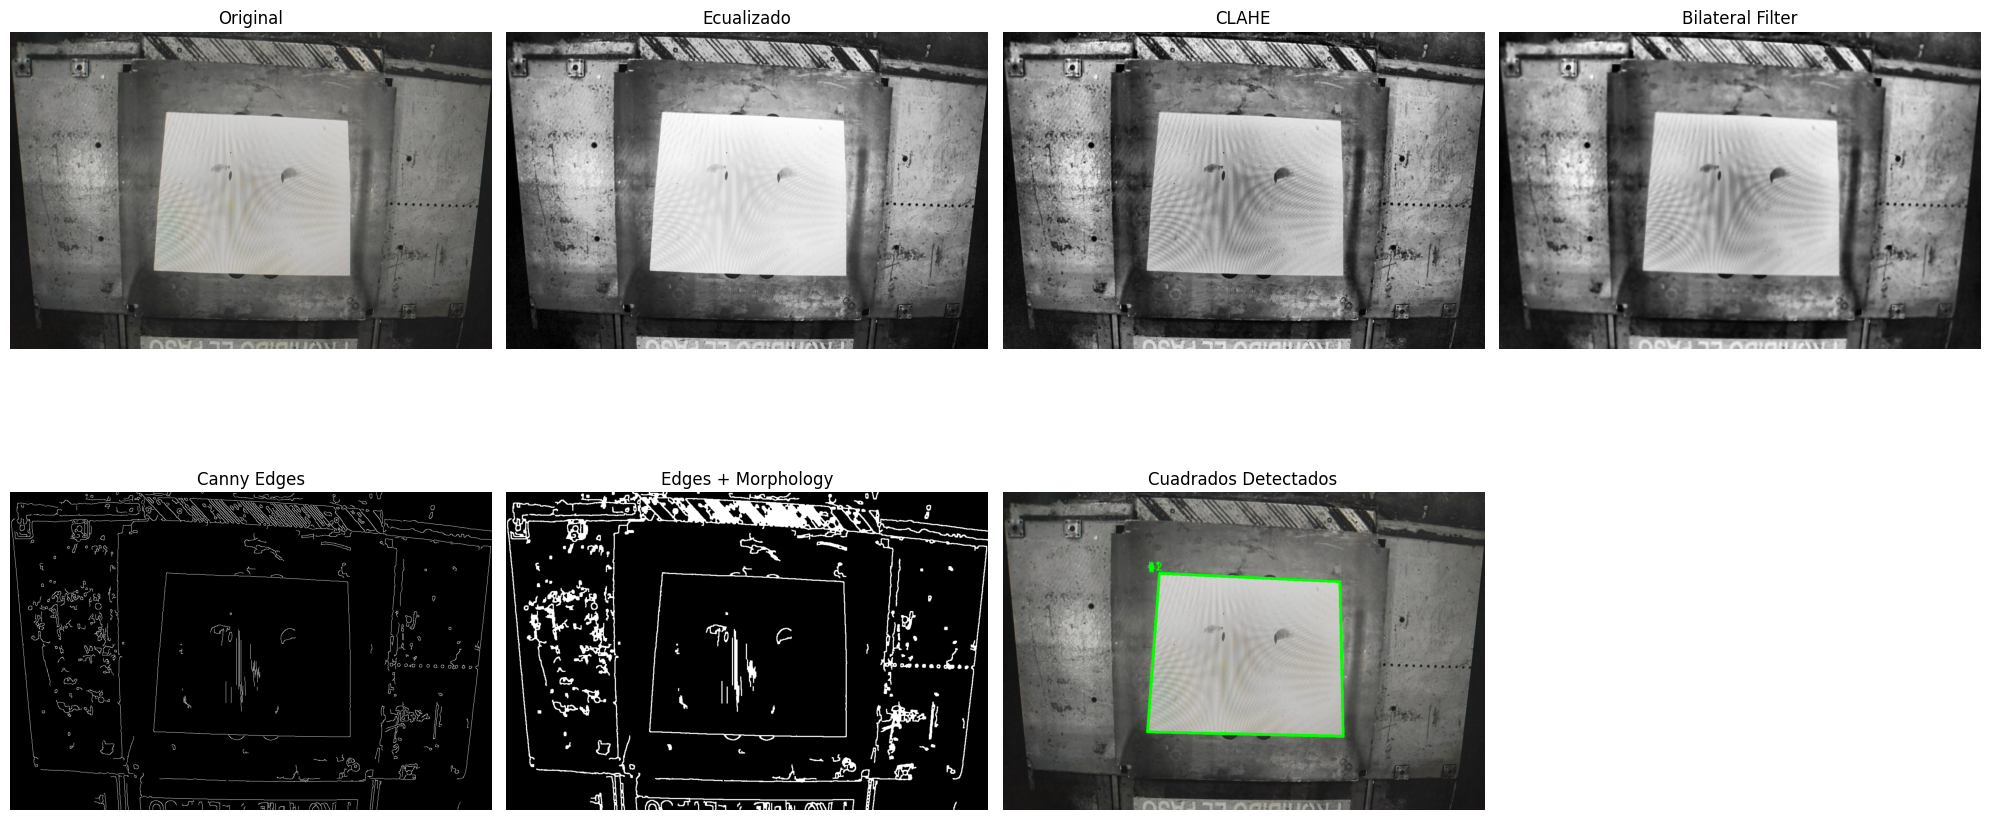

✓ Cuadrado 1 guardado: 523x437 píxeles


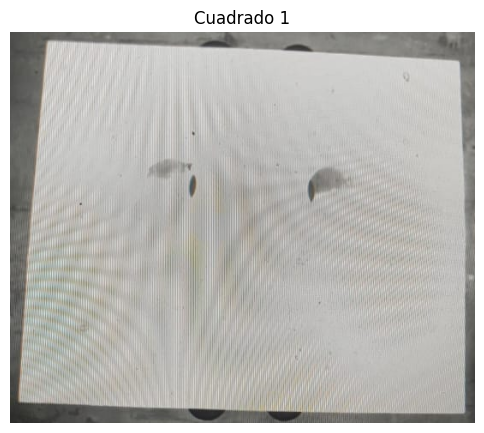

✓ Cuadrado 2 guardado: 518x431 píxeles


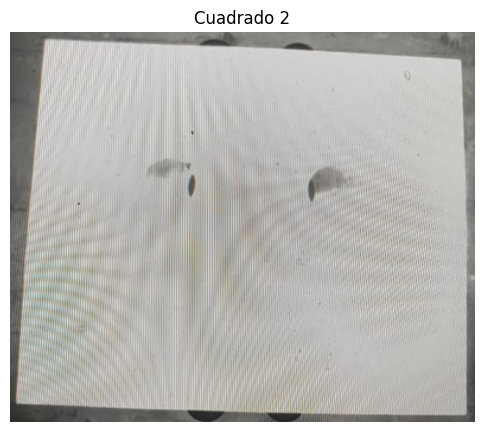

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Cargar la imagen
img = cv2.imread('cuadrado.jpg')

if img is None:
    raise FileNotFoundError("No se pudo cargar la imagen. Verifica la ruta del archivo.")

# Convertir a escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# === PREPROCESAMIENTO MEJORADO ===

# 1. Ecualización de histograma para mejorar contraste
equalized = cv2.equalizeHist(gray)

# 2. Aplicar CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(gray)

# 3. Desenfoque bilateral (preserva bordes)
bilateral = cv2.bilateralFilter(clahe_img, 9, 75, 75)

# 4. Detección de bordes con Canny (parámetros ajustados)
edges = cv2.Canny(bilateral, 30, 100, L2gradient = True)

# 5. Operaciones morfológicas para cerrar gaps
kernel = np.ones((3,3), np.uint8)
edges_closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel, iterations=2)
edges_dilated = cv2.dilate(edges_closed, kernel, iterations=1)

# === DETECCIÓN DE CONTORNOS ===

# Encontrar contornos
contours, hierarchy = cv2.findContours(edges_dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Filtrar contornos
rectangulos = []
img_debug = img.copy()

print(f"Total de contornos encontrados: {len(contours)}")

for i, cnt in enumerate(contours):
    # Calcular área
    area = cv2.contourArea(cnt)
    
    # Filtrar por área mínima
    if area < 5000:  # Ajusta este valor según el tamaño de tus cuadrados
        continue
    
    # Aproximar el contorno
    perimeter = cv2.arcLength(cnt, True)
    epsilon = 0.04 * perimeter
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    
    # Obtener rectángulo delimitador
    x, y, w, h = cv2.boundingRect(approx)
    aspect_ratio = float(w) / h
    
    # Calcular qué tan lleno está el rectángulo
    rect_area = w * h
    extent = float(area) / rect_area if rect_area > 0 else 0
    
    print(f"Contorno {i}: área={area:.0f}, lados={len(approx)}, ratio={aspect_ratio:.2f}, extent={extent:.2f}")
    
    # Filtrar por características de cuadrado
    if (len(approx) >= 4 and 
        0.7 < aspect_ratio < 1.3 and 
        extent > 0.7 and
        area > 5000):
        
        rectangulos.append({
            'coords': (x, y, w, h),
            'area': area,
            'y_pos': y,
            'contour': cnt
        })
        
        # Dibujar en imagen de debug
        cv2.drawContours(img_debug, [approx], 0, (0, 255, 0), 3)
        cv2.putText(img_debug, f"#{len(rectangulos)}", (x, y-10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Ordenar por posición vertical (y)
rectangulos.sort(key=lambda r: r['y_pos'])

print(f"\nCuadrados detectados: {len(rectangulos)}")

# === VISUALIZACIÓN DE PREPROCESAMIENTO ===
plt.figure(figsize=(20, 10))

plt.subplot(2, 4, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(equalized, cmap='gray')
plt.title('Ecualizado')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(clahe_img, cmap='gray')
plt.title('CLAHE')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(bilateral, cmap='gray')
plt.title('Bilateral Filter')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(edges_dilated, cmap='gray')
plt.title('Edges + Morphology')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(cv2.cvtColor(img_debug, cv2.COLOR_BGR2RGB))
plt.title('Cuadrados Detectados')
plt.axis('off')

plt.tight_layout()
plt.savefig('preprocesamiento_debug.jpg', dpi=150, bbox_inches='tight')
plt.show()

# === EXTRAER Y GUARDAR CUADRADOS ===
if len(rectangulos) >= 2:
    for i, rect in enumerate(rectangulos[:2]):
        x, y, w, h = rect['coords']
        
        # Extraer con un pequeño margen
        margin = 10
        y1 = max(0, y - margin)
        y2 = min(img.shape[0], y + h + margin)
        x1 = max(0, x - margin)
        x2 = min(img.shape[1], x + w + margin)
        
        cuadrado = img[y1:y2, x1:x2]
        
        # Guardar
        cv2.imwrite(f'cuadrado_{i+1}.jpg', cuadrado)
        print(f"✓ Cuadrado {i+1} guardado: {w}x{h} píxeles")
        
        # Mostrar
        plt.figure(figsize=(6, 6))
        plt.imshow(cv2.cvtColor(cuadrado, cv2.COLOR_BGR2RGB))
        plt.title(f'Cuadrado {i+1}')
        plt.axis('off')
        plt.show()
else:
    print("\n⚠️ No se detectaron suficientes cuadrados.")
    print("Revisa la imagen 'preprocesamiento_debug.jpg' para ver qué se detectó.")
    print("\nPrueba ajustar estos parámetros:")
    print("- area > 5000  (línea 36 y 59)")
    print("- aspect_ratio entre 0.7 y 1.3 (línea 58)")
    print("- Parámetros de Canny (línea 27)")